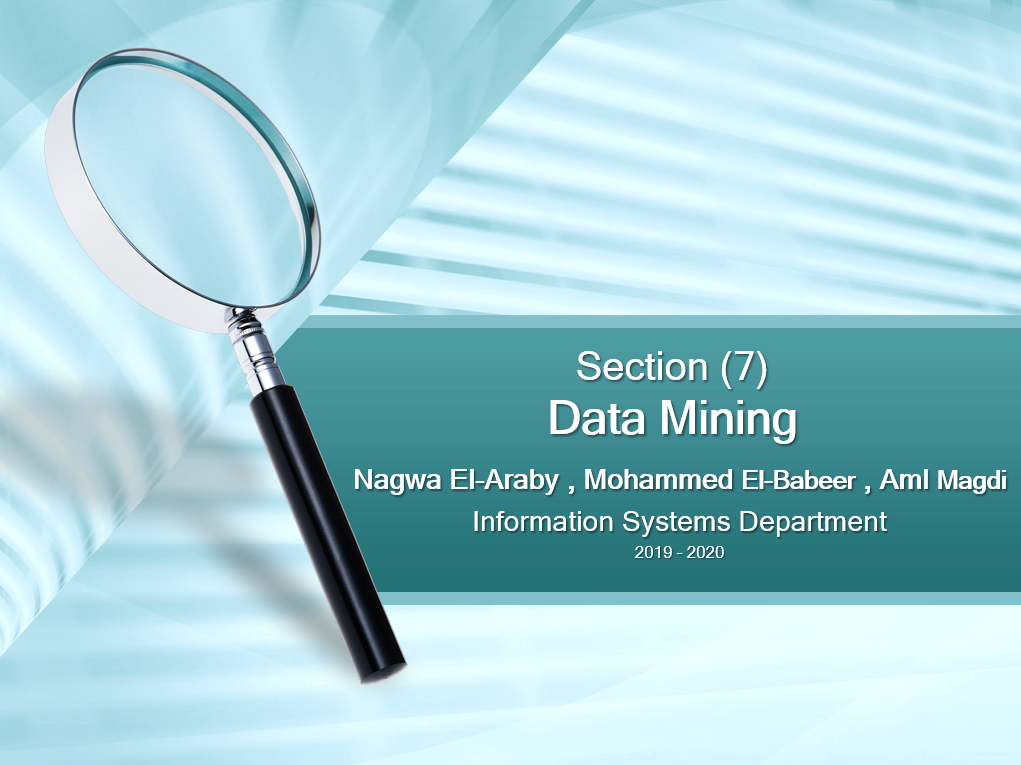

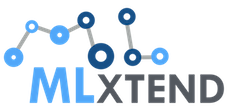
<center><h1>Mlxtend</h1><h6>(machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks.</h6></center>

<h3>How to install mlxtend?</h3>
- Using python : <b>!pip install mlxtend</b> <br>
- Using Anconda : <b>conda install mlxtend</b>

<h2>Frequent Itemsets using Apriori Algorithm</h2>
- Apriori function to extract frequent itemsets for association rule mining <br/>
- Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.

In [4]:
# transaction data
dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

The <b>apriori function</b> expects data in a one-hot encoded pandas DataFrame. <br>
- For basic one-hot encoding with Pandas you simply pass your data frame into the get_dummies function. 
- This returns a new dataframe with a column for every "level" of rating that exists, along with either a 1 or 0 specifying the presence of that rating for a given observation.

In [5]:
import pandas as pd
#Encodes database transaction data in form of a Python list of lists into a NumPy array.
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [6]:
# Return the items and itemsets with at least 60% support
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


- By default, apriori returns the column indices of the items<br>
- For better readability, we can set <b>use_colnames=True</b> to convert these integer values into the respective item names

In [8]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


<p>The advantage of working with pandas <code>DataFrames</code> is that we can use its convenient features to filter the results. For instance, let's assume we are only interested in itemsets of length 2 that have a support of at least 80 percent. First, we create the frequent itemsets via <code>apriori</code> and add a new column that stores the length of each itemset:</p>

In [9]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Kidney Beans, Eggs)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Kidney Beans, Yogurt)",2


In [10]:
# Select the results that satisfy our desired criteria as follows
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [11]:
# Using the Pandas API, we can select entries based on the "itemsets" column
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length
6,0.6,"(Eggs, Onion)",2


<h2 id="association-rules-generation-from-frequent-itemsets">Association Rules Generation from Frequent Itemsets</h2>
<h2 id="overview">Overview</h2>
<p>Rule generation is a common task in the mining of frequent patterns. <em>An association rule is an implication expression of the form <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>X</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mi>Y</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 3.581em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.876em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.716em, 1002.88em, 2.674em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="mi" id="MathJax-Span-3" style="font-family: STIXGeneral; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span class="mo" id="MathJax-Span-4" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mi" id="MathJax-Span-5" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.305em;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.103em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>X</mi><mo stretchy="false">→</mo><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-1">X \rightarrow Y</script>, where <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>X</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-6" style="width: 0.809em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.716em, 1000.66em, 2.674em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-7"><span class="mi" id="MathJax-Span-8" style="font-family: STIXGeneral; font-style: italic;">X<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>X</mi></math></span></span><script type="math/tex" id="MathJax-Element-2">X</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>Y</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-9" style="width: 0.809em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.716em, 1000.66em, 2.674em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-10"><span class="mi" id="MathJax-Span-11" style="font-family: STIXGeneral; font-style: italic;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.103em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>Y</mi></math></span></span><script type="math/tex" id="MathJax-Element-3">Y</script> are disjoint itemsets</em>. A more concrete example based on consumer behaviour would be  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>{</mo><mi>D</mi><mi>i</mi><mi>a</mi><mi>p</mi><mi>e</mi><mi>r</mi><mi>s</mi><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>}</mo><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>{</mo><mi>B</mi><mi>e</mi><mi>e</mi><mi>r</mi><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>}</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-12" style="width: 10.638em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.571em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.716em, 1008.47em, 2.876em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-13"><span class="mo" id="MathJax-Span-14" style="font-family: STIXGeneral;">{</span><span class="mi" id="MathJax-Span-15" style="font-family: STIXGeneral; font-style: italic;">D</span><span class="mi" id="MathJax-Span-16" style="font-family: STIXGeneral; font-style: italic;">i</span><span class="mi" id="MathJax-Span-17" style="font-family: STIXGeneral; font-style: italic;">a</span><span class="mi" id="MathJax-Span-18" style="font-family: STIXGeneral; font-style: italic;">p</span><span class="mi" id="MathJax-Span-19" style="font-family: STIXGeneral; font-style: italic;">e</span><span class="mi" id="MathJax-Span-20" style="font-family: STIXGeneral; font-style: italic;">r<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-21" style="font-family: STIXGeneral; font-style: italic;">s</span><span class="mo" id="MathJax-Span-22" style="font-family: STIXGeneral;">}</span><span class="mo" id="MathJax-Span-23" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mo" id="MathJax-Span-24" style="font-family: STIXGeneral; padding-left: 0.305em;">{</span><span class="mi" id="MathJax-Span-25" style="font-family: STIXGeneral; font-style: italic;">B</span><span class="mi" id="MathJax-Span-26" style="font-family: STIXGeneral; font-style: italic;">e</span><span class="mi" id="MathJax-Span-27" style="font-family: STIXGeneral; font-style: italic;">e</span><span class="mi" id="MathJax-Span-28" style="font-family: STIXGeneral; font-style: italic;">r<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-29" style="font-family: STIXGeneral;">}</span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.253em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo fence="false" stretchy="false">{</mo><mi>D</mi><mi>i</mi><mi>a</mi><mi>p</mi><mi>e</mi><mi>r</mi><mi>s</mi><mo fence="false" stretchy="false">}</mo><mo stretchy="false">→</mo><mo fence="false" stretchy="false">{</mo><mi>B</mi><mi>e</mi><mi>e</mi><mi>r</mi><mo fence="false" stretchy="false">}</mo></math></span></span><script type="math/tex" id="MathJax-Element-4">\{Diapers\} \rightarrow \{Beer\}</script> suggesting that people who buy diapers are also likely to buy beer. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation make use of the <code>confidence</code> and <code>lift</code> metrics. </p>

<h3 id="metrics">Metrics</h3>
<p>The currently supported metrics for evaluating association rules and setting selection thresholds are listed below. Given a rule "A -&gt; C", <em>A</em> stands for antecedent and <em>C</em> stands for consequent.</p>
<h4 id="support">'support':</h4>
<p>
<span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-5-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtext>support</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mtext>support</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo>&amp;#x222A;</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo><mo>,</mo><mspace width=&quot;thickmathspace&quot; /><mspace width=&quot;thickmathspace&quot; /><mspace width=&quot;thickmathspace&quot; /><mtext>range:&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-30" style="width: 24.952em; display: inline-block;"><span style="display: inline-block; position: relative; width: 20.113em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.716em, 1020.01em, 2.876em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-31"><span class="mtext" id="MathJax-Span-32" style="font-family: STIXGeneral;">support</span><span class="mo" id="MathJax-Span-33" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-34" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-35" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mi" id="MathJax-Span-36" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.305em;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-37" style="font-family: STIXGeneral;">)</span><span class="mo" id="MathJax-Span-38" style="font-family: STIXGeneral; padding-left: 0.305em;">=</span><span class="mtext" id="MathJax-Span-39" style="font-family: STIXGeneral; padding-left: 0.305em;">support</span><span class="mo" id="MathJax-Span-40" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-41" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-42" style="font-family: STIXGeneral; padding-left: 0.255em;">∪</span><span class="mi" id="MathJax-Span-43" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.255em;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-44" style="font-family: STIXGeneral;">)</span><span class="mo" id="MathJax-Span-45" style="font-family: STIXGeneral;">,</span><span class="mspace" id="MathJax-Span-46" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mspace" id="MathJax-Span-47" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mspace" id="MathJax-Span-48" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mtext" id="MathJax-Span-49" style="font-family: STIXGeneral; padding-left: 0.204em;">range:&nbsp;</span><span class="mo" id="MathJax-Span-50" style="font-family: STIXGeneral;">[</span><span class="mn" id="MathJax-Span-51" style="font-family: STIXGeneral;">0</span><span class="mo" id="MathJax-Span-52" style="font-family: STIXGeneral;">,</span><span class="mn" id="MathJax-Span-53" style="font-family: STIXGeneral; padding-left: 0.204em;">1</span><span class="mo" id="MathJax-Span-54" style="font-family: STIXGeneral;">]</span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.253em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>support</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">→</mo><mi>C</mi><mo stretchy="false">)</mo><mo>=</mo><mtext>support</mtext><mo stretchy="false">(</mo><mi>A</mi><mo>∪</mo><mi>C</mi><mo stretchy="false">)</mo><mo>,</mo><mspace width="thickmathspace"></mspace><mspace width="thickmathspace"></mspace><mspace width="thickmathspace"></mspace><mtext>range:&nbsp;</mtext><mo stretchy="false">[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy="false">]</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-5">\text{support}(A\rightarrow C) = \text{support}(A \cup C), \;\;\; \text{range: } [0, 1]</script>
</p>
<p>The support metric is defined for itemsets, not assocication rules. The table produced by the association rule mining algorithm contains three different support metrics: 'antecedent support', 'consequent support', and 'support'. Here, 'antecedent support' computes the proportion of transactions that contain the antecedent A, and 'consequent support' computes the support for the itemset of the consequent C. The 'support' metric then computes the support of the combined itemset A <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-6-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo>&amp;#x222A;</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-55" style="width: 0.759em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.817em, 1000.56em, 2.724em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-56"><span class="mo" id="MathJax-Span-57" style="font-family: STIXGeneral;">∪</span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.122em; border-left: 0px solid; width: 0px; height: 0.816em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo>∪</mo></math></span></span><script type="math/tex" id="MathJax-Element-6">\cup</script> C -- note that 'support' depends on 'antecedent support' and 'consequent support' via min('antecedent support', 'consequent support').</p>
<h4 id="confidence">'confidence':</h4>
<p>
<span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-7-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtext>confidence</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mfrac><mrow><mtext>support</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo></mrow><mrow><mtext>support</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo stretchy=&quot;false&quot;>)</mo></mrow></mfrac><mo>,</mo><mspace width=&quot;thickmathspace&quot; /><mspace width=&quot;thickmathspace&quot; /><mspace width=&quot;thickmathspace&quot; /><mtext>range:&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-58" style="width: 27.472em; display: inline-block;"><span style="display: inline-block; position: relative; width: 22.13em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.011em, 1022.03em, 3.581em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-59"><span class="mtext" id="MathJax-Span-60" style="font-family: STIXGeneral;">confidence</span><span class="mo" id="MathJax-Span-61" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-62" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-63" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mi" id="MathJax-Span-64" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.305em;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-65" style="font-family: STIXGeneral;">)</span><span class="mo" id="MathJax-Span-66" style="font-family: STIXGeneral; padding-left: 0.305em;">=</span><span class="mfrac" id="MathJax-Span-67" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 6.605em; height: 0px; margin-right: 0.103em; margin-left: 0.103em;"><span style="position: absolute; clip: rect(3.178em, 1006.45em, 4.337em, -999.997em); top: -4.685em; left: 50%; margin-left: -3.223em;"><span class="mrow" id="MathJax-Span-68"><span class="mtext" id="MathJax-Span-69" style="font-family: STIXGeneral;">support</span><span class="mo" id="MathJax-Span-70" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-71" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-72" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mi" id="MathJax-Span-73" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.305em;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-74" style="font-family: STIXGeneral;">)</span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.178em, 1004.24em, 4.337em, -999.997em); top: -3.274em; left: 50%; margin-left: -2.114em;"><span class="mrow" id="MathJax-Span-75"><span class="mtext" id="MathJax-Span-76" style="font-family: STIXGeneral;">support</span><span class="mo" id="MathJax-Span-77" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-78" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-79" style="font-family: STIXGeneral;">)</span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(0.859em, 1006.61em, 1.212em, -999.997em); top: -1.258em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 6.605em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.061em;"></span></span></span></span><span class="mo" id="MathJax-Span-80" style="font-family: STIXGeneral;">,</span><span class="mspace" id="MathJax-Span-81" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mspace" id="MathJax-Span-82" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mspace" id="MathJax-Span-83" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mtext" id="MathJax-Span-84" style="font-family: STIXGeneral; padding-left: 0.204em;">range:&nbsp;</span><span class="mo" id="MathJax-Span-85" style="font-family: STIXGeneral;">[</span><span class="mn" id="MathJax-Span-86" style="font-family: STIXGeneral;">0</span><span class="mo" id="MathJax-Span-87" style="font-family: STIXGeneral;">,</span><span class="mn" id="MathJax-Span-88" style="font-family: STIXGeneral; padding-left: 0.204em;">1</span><span class="mo" id="MathJax-Span-89" style="font-family: STIXGeneral;">]</span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.184em; border-left: 0px solid; width: 0px; height: 2.941em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>confidence</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">→</mo><mi>C</mi><mo stretchy="false">)</mo><mo>=</mo><mfrac><mrow><mtext>support</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">→</mo><mi>C</mi><mo stretchy="false">)</mo></mrow><mrow><mtext>support</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">)</mo></mrow></mfrac><mo>,</mo><mspace width="thickmathspace"></mspace><mspace width="thickmathspace"></mspace><mspace width="thickmathspace"></mspace><mtext>range:&nbsp;</mtext><mo stretchy="false">[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy="false">]</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-7">\text{confidence}(A\rightarrow C) = \frac{\text{support}(A\rightarrow C)}{\text{support}(A)}, \;\;\; \text{range: } [0, 1]</script>
</p>
<p>The confidence of a rule A-&gt;C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A-&gt;C is different than the confidence for C-&gt;A. The confidence is 1 (maximal) for a rule A-&gt;C if the consequent and antecedent always occur together. </p>
<h4 id="lift">'lift':</h4>
<p>
<span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtext>lift</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><mfrac><mrow><mtext>confidence</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>A</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo></mrow><mrow><mtext>support</mtext><mo stretchy=&quot;false&quot;>(</mo><mi>C</mi><mo stretchy=&quot;false&quot;>)</mo></mrow></mfrac><mo>,</mo><mspace width=&quot;thickmathspace&quot; /><mspace width=&quot;thickmathspace&quot; /><mspace width=&quot;thickmathspace&quot; /><mtext>range:&amp;#xA0;</mtext><mo stretchy=&quot;false&quot;>[</mo><mn>0</mn><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x221E;</mi><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-90" style="width: 25.809em; display: inline-block;"><span style="display: inline-block; position: relative; width: 20.819em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.011em, 1020.72em, 3.581em, -999.997em); top: -2.518em; left: 0em;"><span class="mrow" id="MathJax-Span-91"><span class="mtext" id="MathJax-Span-92" style="font-family: STIXGeneral;">lift</span><span class="mo" id="MathJax-Span-93" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-94" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-95" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mi" id="MathJax-Span-96" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.305em;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-97" style="font-family: STIXGeneral;">)</span><span class="mo" id="MathJax-Span-98" style="font-family: STIXGeneral; padding-left: 0.305em;">=</span><span class="mfrac" id="MathJax-Span-99" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 8.017em; height: 0px; margin-right: 0.103em; margin-left: 0.103em;"><span style="position: absolute; clip: rect(3.128em, 1007.87em, 4.337em, -999.997em); top: -4.635em; left: 50%; margin-left: -3.929em;"><span class="mrow" id="MathJax-Span-100"><span class="mtext" id="MathJax-Span-101" style="font-family: STIXGeneral;">confidence</span><span class="mo" id="MathJax-Span-102" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-103" style="font-family: STIXGeneral; font-style: italic;">A</span><span class="mo" id="MathJax-Span-104" style="font-family: STIXGeneral; padding-left: 0.305em;">→</span><span class="mi" id="MathJax-Span-105" style="font-family: STIXGeneral; font-style: italic; padding-left: 0.305em;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-106" style="font-family: STIXGeneral;">)</span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.178em, 1004.29em, 4.337em, -999.997em); top: -3.274em; left: 50%; margin-left: -2.165em;"><span class="mrow" id="MathJax-Span-107"><span class="mtext" id="MathJax-Span-108" style="font-family: STIXGeneral;">support</span><span class="mo" id="MathJax-Span-109" style="font-family: STIXGeneral;">(</span><span class="mi" id="MathJax-Span-110" style="font-family: STIXGeneral; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-111" style="font-family: STIXGeneral;">)</span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(0.859em, 1008.02em, 1.212em, -999.997em); top: -1.258em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 8.017em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.061em;"></span></span></span></span><span class="mo" id="MathJax-Span-112" style="font-family: STIXGeneral;">,</span><span class="mspace" id="MathJax-Span-113" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mspace" id="MathJax-Span-114" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mspace" id="MathJax-Span-115" style="height: 0em; vertical-align: 0em; width: 0.305em; display: inline-block; overflow: hidden;"></span><span class="mtext" id="MathJax-Span-116" style="font-family: STIXGeneral; padding-left: 0.204em;">range:&nbsp;</span><span class="mo" id="MathJax-Span-117" style="font-family: STIXGeneral;">[</span><span class="mn" id="MathJax-Span-118" style="font-family: STIXGeneral;">0</span><span class="mo" id="MathJax-Span-119" style="font-family: STIXGeneral;">,</span><span class="mi" id="MathJax-Span-120" style="font-family: STIXGeneral; padding-left: 0.204em;">∞</span><span class="mo" id="MathJax-Span-121" style="font-family: STIXGeneral;">]</span></span><span style="display: inline-block; width: 0px; height: 2.523em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.184em; border-left: 0px solid; width: 0px; height: 2.941em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtext>lift</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">→</mo><mi>C</mi><mo stretchy="false">)</mo><mo>=</mo><mfrac><mrow><mtext>confidence</mtext><mo stretchy="false">(</mo><mi>A</mi><mo stretchy="false">→</mo><mi>C</mi><mo stretchy="false">)</mo></mrow><mrow><mtext>support</mtext><mo stretchy="false">(</mo><mi>C</mi><mo stretchy="false">)</mo></mrow></mfrac><mo>,</mo><mspace width="thickmathspace"></mspace><mspace width="thickmathspace"></mspace><mspace width="thickmathspace"></mspace><mtext>range:&nbsp;</mtext><mo stretchy="false">[</mo><mn>0</mn><mo>,</mo><mi mathvariant="normal">∞</mi><mo stretchy="false">]</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-8">\text{lift}(A\rightarrow C) = \frac{\text{confidence}(A\rightarrow C)}{\text{support}(C)}, \;\;\; \text{range: } [0, \infty]</script>
</p>
<p>The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A-&gt;C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.</p>

<h2 id="example-1-generating-association-rules-from-frequent-itemsets">Generating Association Rules from Frequent Itemsets</h2>
<p>The <code>generate_rules()</code> function allows you to:<br>
    (1) specify your metric of interest <br>
    (2) the according threshold. <br>
Currently implemented measures are <strong>confidence</strong> and <strong>lift</strong>. Let's say you are interested in rules derived from the frequent itemsets only if the level of confidence is above the 70 percent threshold (<code>min_threshold=0.7</code>):</p>

In [12]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf


<h2 id="example-2-rule-generation-and-selection-criteria">Rule Generation and Selection Criteria</h2>
<p>If you are interested in rules according to a different metric of interest, you can simply adjust the <code>metric</code> and <code>min_threshold</code> arguments . E.g. if you are only interested in rules that have a lift score of &gt;= 1.2, you would do the following:</p>

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf


<p>Pandas <code>DataFrames</code> make it easy to filter the results further. Let's say we are ony interested in rules that satisfy the following criteria:</p>
<ol>
<li>at least 2 antecedents</li>
<li>a confidence &gt; 0.75</li>
<li>a lift score &gt; 1.2</li>
</ol>

In [14]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1
2,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6,1
5,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf,1


In [15]:
# use pandas' selection syntax as shown below
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2


<h2 id="frequent-itemsets-via-the-fp-growth-algorithm">Frequent Itemsets using FP-Growth Algorithm</h2>
<p><b>FP-Growth</b> is an algorithm for extracting frequent itemsets with applications in association rule learning that emerged as a popular alternative to the established Apriori algorighm. </p>
<p>In general, the algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.</p>
<p>In particular, and what makes it different from the Apriori frequent pattern mining algorithm, FP-Growth is an frequent pattern mining algorithm that does not require candidate generation. Internally, it uses a so-called FP-tree (frequent pattern tree) datastrucure without generating the candidate sets explicitely, which makes is particularly attractive for large datasets.</p>

In [16]:
dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [18]:
# Return the items and itemsets with at least 60% support
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.6)

,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(8)
4,0.6,(6)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(8, 3)"
8,0.6,"(8, 5)"
9,0.6,"(8, 3, 5)"


In [19]:
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Kidney Beans, Yogurt)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Eggs, Onion)"


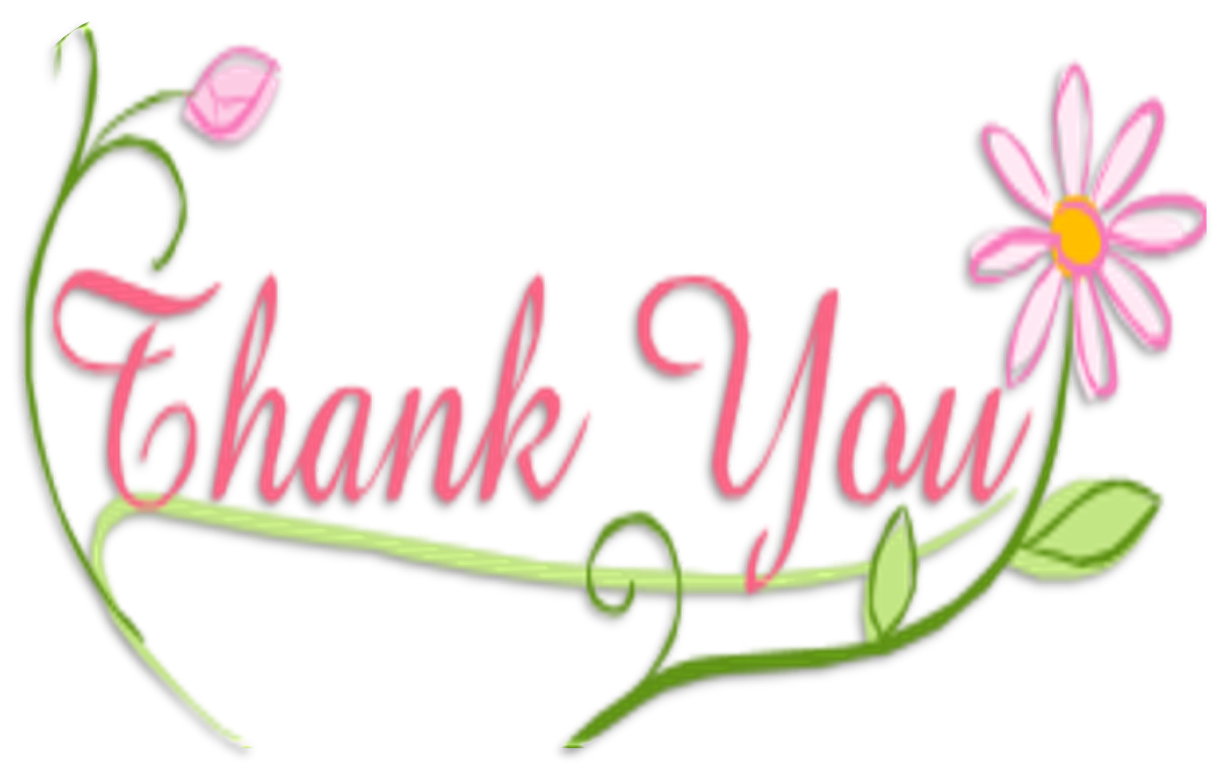